In [31]:
import torch
import os
import matplotlib.pyplot as plt
from utils.data_loader import get_dataloaders
from models.dense_baseline import get_baseline
from models.moe_model import MoEModel
from utils.visualization import HistoryLogger, plot_learning_curves, plot_expert_utilization, compare_params_vs_performance, plot_expert_heatmap
from train import train_baseline, train_moe

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [32]:
# Load Data
# Using a reduced batch size if running on CPU, defaults to 128
batch_size = 64
train_loader, val_loader, test_loader, num_classes, img_size = get_dataloaders(batch_size=batch_size)

print(f"Num Classes: {num_classes}, Image Size: {img_size}")

Loaded CIFAR-100: 45000 train, 5000 val, 10000 test images.
Num Classes: 100, Image Size: (3, 32, 32)


In [50]:
# Configuration for the test run
epochs = 30
save_dir = './test_results'
os.makedirs(save_dir, exist_ok=True)

# 1. Train MoE Model
print("=== Training MoE Model ===")
moe_model = MoEModel(num_experts=8, num_classes=num_classes, input_channels=img_size[0]).to(device)
moe_save_path = os.path.join(save_dir, 'moe_model.pth')

train_moe(moe_model, train_loader, val_loader, test_loader, epochs, device, moe_save_path, aux_weight=10.0)

=== Training MoE Model ===
Starting MoE training on cuda with aux_weight=10.0


Epoch 1/30 [Train MoE]: 100%|██████████| 704/704 [00:07<00:00, 94.47it/s, loss=4.45, acc=6.48] 


Epoch 1: Train Acc: 6.48%, Val Acc: 10.46%, Val Loss: 4.1222, Test Acc: 11.15%


Epoch 2/30 [Train MoE]: 100%|██████████| 704/704 [00:10<00:00, 64.09it/s, loss=3.98, acc=9.79]


Epoch 2: Train Acc: 9.79%, Val Acc: 8.78%, Val Loss: 4.0448, Test Acc: 9.31%


Epoch 3/30 [Train MoE]: 100%|██████████| 704/704 [00:11<00:00, 62.20it/s, loss=3.9, acc=10.8] 


Epoch 3: Train Acc: 10.83%, Val Acc: 11.96%, Val Loss: 3.8405, Test Acc: 12.71%


Epoch 4/30 [Train MoE]: 100%|██████████| 704/704 [00:11<00:00, 59.23it/s, loss=3.87, acc=11.5]


Epoch 4: Train Acc: 11.46%, Val Acc: 11.46%, Val Loss: 3.8610, Test Acc: 13.04%


Epoch 5/30 [Train MoE]: 100%|██████████| 704/704 [00:11<00:00, 59.82it/s, loss=3.88, acc=11.3]


Epoch 5: Train Acc: 11.31%, Val Acc: 12.14%, Val Loss: 3.8232, Test Acc: 13.66%


Epoch 6/30 [Train MoE]: 100%|██████████| 704/704 [00:11<00:00, 61.34it/s, loss=3.79, acc=12.6]


Epoch 6: Train Acc: 12.65%, Val Acc: 13.74%, Val Loss: 3.7311, Test Acc: 15.32%


Epoch 7/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 58.61it/s, loss=3.76, acc=13.1]


Epoch 7: Train Acc: 13.05%, Val Acc: 14.24%, Val Loss: 3.6981, Test Acc: 16.41%


Epoch 8/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 57.76it/s, loss=3.71, acc=14.1]


Epoch 8: Train Acc: 14.06%, Val Acc: 14.62%, Val Loss: 3.7356, Test Acc: 16.91%


Epoch 9/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 57.34it/s, loss=3.68, acc=14.8]


Epoch 9: Train Acc: 14.84%, Val Acc: 13.32%, Val Loss: 3.7413, Test Acc: 15.60%


Epoch 10/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 56.15it/s, loss=3.65, acc=15.4]


Epoch 10: Train Acc: 15.37%, Val Acc: 12.24%, Val Loss: 3.9267, Test Acc: 12.68%


Epoch 11/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 56.93it/s, loss=3.64, acc=15.5]


Epoch 11: Train Acc: 15.53%, Val Acc: 16.00%, Val Loss: 3.6080, Test Acc: 18.15%


Epoch 12/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 57.17it/s, loss=3.58, acc=16.6]


Epoch 12: Train Acc: 16.56%, Val Acc: 17.58%, Val Loss: 3.5245, Test Acc: 19.85%


Epoch 13/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 57.27it/s, loss=3.5, acc=18]   


Epoch 13: Train Acc: 18.04%, Val Acc: 17.04%, Val Loss: 3.5703, Test Acc: 18.29%


Epoch 14/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 56.54it/s, loss=3.46, acc=18.4]


Epoch 14: Train Acc: 18.45%, Val Acc: 17.76%, Val Loss: 3.4751, Test Acc: 20.53%


Epoch 15/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 57.19it/s, loss=3.41, acc=19.3]


Epoch 15: Train Acc: 19.28%, Val Acc: 19.30%, Val Loss: 3.4155, Test Acc: 20.77%


Epoch 16/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 55.51it/s, loss=3.34, acc=20.8]


Epoch 16: Train Acc: 20.77%, Val Acc: 19.98%, Val Loss: 3.5083, Test Acc: 22.29%


Epoch 17/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 55.50it/s, loss=3.27, acc=21.7]


Epoch 17: Train Acc: 21.73%, Val Acc: 22.18%, Val Loss: 3.2710, Test Acc: 23.91%


Epoch 18/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 55.72it/s, loss=3.19, acc=23]  


Epoch 18: Train Acc: 22.97%, Val Acc: 23.84%, Val Loss: 3.2387, Test Acc: 25.98%


Epoch 19/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 56.48it/s, loss=3.13, acc=24.1]


Epoch 19: Train Acc: 24.14%, Val Acc: 24.80%, Val Loss: 3.1679, Test Acc: 27.30%


Epoch 20/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 55.57it/s, loss=3.05, acc=25.5]


Epoch 20: Train Acc: 25.53%, Val Acc: 25.92%, Val Loss: 3.0964, Test Acc: 28.04%


Epoch 21/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 56.40it/s, loss=2.96, acc=27.5]


Epoch 21: Train Acc: 27.49%, Val Acc: 25.36%, Val Loss: 3.0962, Test Acc: 28.87%


Epoch 22/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 55.50it/s, loss=2.9, acc=28.7] 


Epoch 22: Train Acc: 28.73%, Val Acc: 27.26%, Val Loss: 3.0051, Test Acc: 29.61%


Epoch 23/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 55.68it/s, loss=2.83, acc=30]  


Epoch 23: Train Acc: 29.96%, Val Acc: 28.66%, Val Loss: 2.9425, Test Acc: 31.79%


Epoch 24/30 [Train MoE]: 100%|██████████| 704/704 [00:13<00:00, 52.45it/s, loss=2.74, acc=31.9]


Epoch 24: Train Acc: 31.85%, Val Acc: 30.26%, Val Loss: 2.8594, Test Acc: 33.64%


Epoch 25/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 55.57it/s, loss=2.67, acc=33.5]


Epoch 25: Train Acc: 33.48%, Val Acc: 31.34%, Val Loss: 2.7871, Test Acc: 33.90%


Epoch 26/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 55.95it/s, loss=2.59, acc=34.9]


Epoch 26: Train Acc: 34.87%, Val Acc: 32.40%, Val Loss: 2.7399, Test Acc: 35.78%


Epoch 27/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 55.25it/s, loss=2.52, acc=36.8]


Epoch 27: Train Acc: 36.79%, Val Acc: 33.46%, Val Loss: 2.6825, Test Acc: 36.50%


Epoch 28/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 55.07it/s, loss=2.48, acc=37.9]


Epoch 28: Train Acc: 37.89%, Val Acc: 33.78%, Val Loss: 2.6617, Test Acc: 37.23%


Epoch 29/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 55.40it/s, loss=2.43, acc=38.6]


Epoch 29: Train Acc: 38.65%, Val Acc: 34.86%, Val Loss: 2.6432, Test Acc: 38.38%


Epoch 30/30 [Train MoE]: 100%|██████████| 704/704 [00:12<00:00, 56.22it/s, loss=2.41, acc=39.4]


Epoch 30: Train Acc: 39.39%, Val Acc: 34.96%, Val Loss: 2.6252, Test Acc: 38.86%
MoE Training finished. Final Test Accuracy: 38.86%


In [44]:
epochs = 10
# 2. Train Baseline (Width x1.0)
print("\n=== Training Baseline (Width x1.0) ===")
baseline_w1 = get_baseline(input_shape=img_size, num_classes=num_classes, width_multiplier=1.0).to(device)
baseline_w1_save_path = os.path.join(save_dir, 'baseline_w1.0.pth')

train_baseline(baseline_w1, train_loader, val_loader, test_loader, epochs, device, baseline_w1_save_path)


=== Training Baseline (Width x1.0) ===
Starting Dense Baseline training on cuda...


Epoch 1/10 [Train]:   0%|          | 0/704 [00:00<?, ?it/s]

Epoch 1/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 129.64it/s, loss=4.11, acc=6.24]


Epoch 1: Train Acc: 6.24%, Val Acc: 8.36%, Val Loss: 3.9604, Test Acc: 9.93%


Epoch 2/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 131.76it/s, loss=3.78, acc=11.3]


Epoch 2: Train Acc: 11.32%, Val Acc: 10.08%, Val Loss: 3.9721, Test Acc: 11.55%


Epoch 3/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 129.73it/s, loss=3.62, acc=14.3]


Epoch 3: Train Acc: 14.29%, Val Acc: 16.30%, Val Loss: 3.5272, Test Acc: 18.08%


Epoch 4/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 122.05it/s, loss=3.44, acc=17.4]


Epoch 4: Train Acc: 17.40%, Val Acc: 17.96%, Val Loss: 3.4131, Test Acc: 19.86%


Epoch 5/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 126.58it/s, loss=3.29, acc=20]  


Epoch 5: Train Acc: 19.99%, Val Acc: 21.32%, Val Loss: 3.2429, Test Acc: 23.76%


Epoch 6/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 130.04it/s, loss=3.13, acc=22.7]


Epoch 6: Train Acc: 22.72%, Val Acc: 22.56%, Val Loss: 3.2291, Test Acc: 25.86%


Epoch 7/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 120.83it/s, loss=2.95, acc=26.3]


Epoch 7: Train Acc: 26.26%, Val Acc: 23.42%, Val Loss: 3.1693, Test Acc: 27.69%


Epoch 8/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 128.27it/s, loss=2.78, acc=30.1]


Epoch 8: Train Acc: 30.06%, Val Acc: 29.30%, Val Loss: 2.8383, Test Acc: 33.33%


Epoch 9/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 126.11it/s, loss=2.62, acc=33.2]


Epoch 9: Train Acc: 33.22%, Val Acc: 32.58%, Val Loss: 2.6728, Test Acc: 36.51%


Epoch 10/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 129.56it/s, loss=2.49, acc=36.1]


Epoch 10: Train Acc: 36.13%, Val Acc: 34.52%, Val Loss: 2.5939, Test Acc: 38.47%
Training finished. Final Test Accuracy: 38.47%


In [45]:
# 3. Train Baseline (Width x2.0)
print("\n=== Training Baseline (Width x2.0) ===")
baseline_w2 = get_baseline(input_shape=img_size, num_classes=num_classes, width_multiplier=2.0).to(device)
baseline_w2_save_path = os.path.join(save_dir, 'baseline_w2.0.pth')

train_baseline(baseline_w2, train_loader, val_loader, test_loader, epochs, device, baseline_w2_save_path)


=== Training Baseline (Width x2.0) ===
Starting Dense Baseline training on cuda...


Epoch 1/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 126.71it/s, loss=4.28, acc=4.26]


Epoch 1: Train Acc: 4.26%, Val Acc: 7.32%, Val Loss: 3.9748, Test Acc: 7.88%


Epoch 2/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 125.84it/s, loss=3.88, acc=9.55]


Epoch 2: Train Acc: 9.55%, Val Acc: 11.06%, Val Loss: 3.8501, Test Acc: 12.33%


Epoch 3/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 126.01it/s, loss=3.62, acc=14.1]


Epoch 3: Train Acc: 14.11%, Val Acc: 14.90%, Val Loss: 3.6423, Test Acc: 16.77%


Epoch 4/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 123.62it/s, loss=3.42, acc=17.9]


Epoch 4: Train Acc: 17.89%, Val Acc: 17.86%, Val Loss: 3.4801, Test Acc: 20.04%


Epoch 5/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 127.60it/s, loss=3.23, acc=21.3]


Epoch 5: Train Acc: 21.28%, Val Acc: 21.60%, Val Loss: 3.2303, Test Acc: 24.77%


Epoch 6/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 126.75it/s, loss=3.04, acc=24.8]


Epoch 6: Train Acc: 24.82%, Val Acc: 25.10%, Val Loss: 3.0706, Test Acc: 28.06%


Epoch 7/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 128.39it/s, loss=2.84, acc=28.7]


Epoch 7: Train Acc: 28.66%, Val Acc: 29.00%, Val Loss: 2.8279, Test Acc: 31.56%


Epoch 8/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 126.67it/s, loss=2.63, acc=32.9]


Epoch 8: Train Acc: 32.86%, Val Acc: 32.64%, Val Loss: 2.6840, Test Acc: 36.07%


Epoch 9/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 127.85it/s, loss=2.46, acc=36.7]


Epoch 9: Train Acc: 36.70%, Val Acc: 34.90%, Val Loss: 2.5681, Test Acc: 39.69%


Epoch 10/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 126.30it/s, loss=2.31, acc=40]  


Epoch 10: Train Acc: 40.01%, Val Acc: 37.30%, Val Loss: 2.4344, Test Acc: 41.79%
Training finished. Final Test Accuracy: 41.79%


In [51]:
# Load Histories
moe_hist_path = moe_save_path.replace('.pth', '_history.json')
base_w1_hist_path = baseline_w1_save_path.replace('.pth', '_history.json')
base_w2_hist_path = baseline_w2_save_path.replace('.pth', '_history.json')

history_moe = HistoryLogger.load(moe_hist_path).history
history_base_w1 = HistoryLogger.load(base_w1_hist_path).history
history_base_w2 = HistoryLogger.load(base_w2_hist_path).history

print("Histories loaded.")

Histories loaded.


ValueError: x and y must have same first dimension, but have shapes (30,) and (10,)

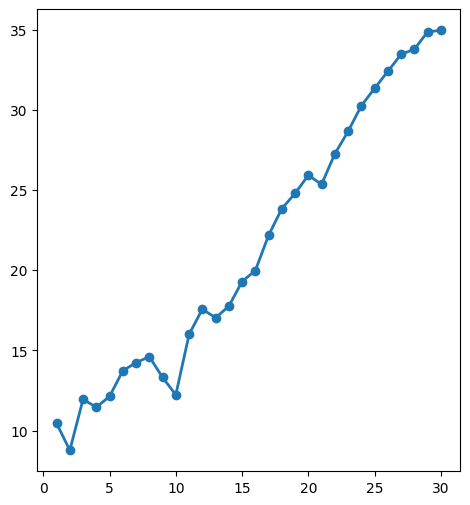

In [52]:
# Visualization: 3-Way Comparison
epochs_range = range(1, len(history_moe['train_acc']) + 1)

plt.figure(figsize=(12, 6))

# Plot Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_moe['val_acc'], label='MoE', linewidth=2, marker='o')
plt.plot(epochs_range, history_base_w1['val_acc'], label='Baseline (x1.0)', linestyle='--', marker='x')
plt.plot(epochs_range, history_base_w2['val_acc'], label='Baseline (x2.0)', linestyle='-.', marker='s')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_moe['val_loss'], label='MoE', linewidth=2, marker='o')
plt.plot(epochs_range, history_base_w1['val_loss'], label='Baseline (x1.0)', linestyle='--', marker='x')
plt.plot(epochs_range, history_base_w2['val_loss'], label='Baseline (x2.0)', linestyle='-.', marker='s')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Expert Utilization Plot:


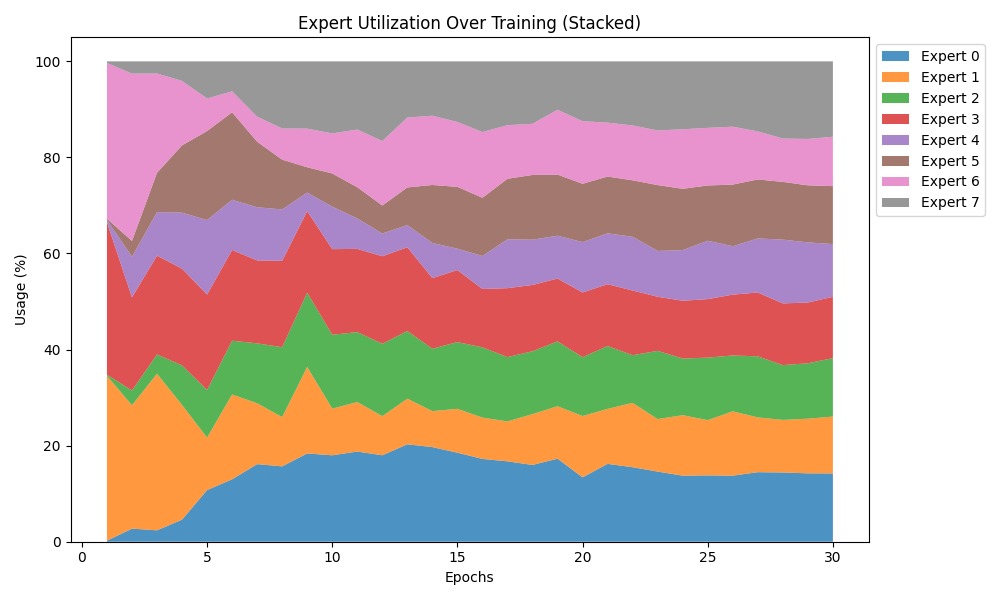

In [53]:
# Visualization: Expert Utilization
from IPython.display import Image, display

# Call the library function
plot_expert_utilization(HistoryLogger.load(moe_hist_path), save_dir)

# Display the saved image
print("Expert Utilization Plot:")
display(Image(filename=os.path.join(save_dir, 'expert_utilization_evolution.png')))

=== Plot 1: Accuracy vs Total Parameters (Storage Cost) ===
Conclusion: MoE requires more memory (Storage).


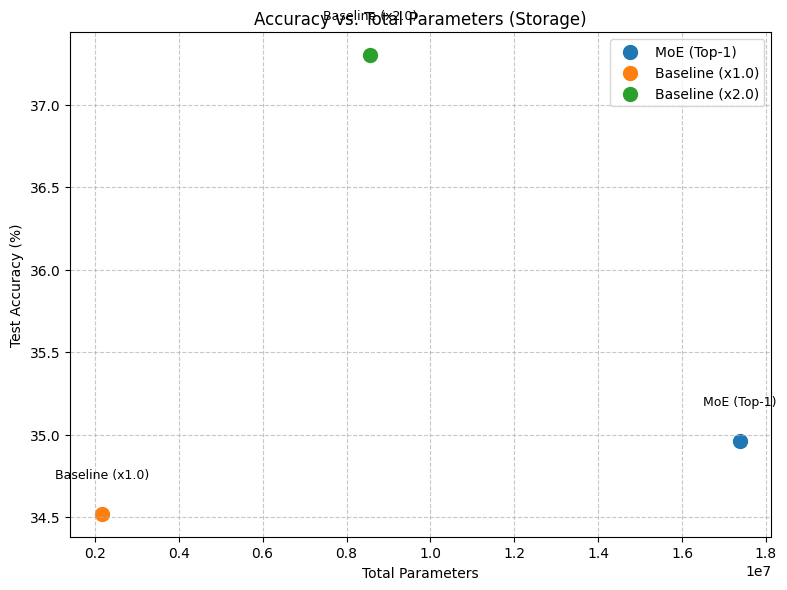


=== Plot 2: Accuracy vs Active Parameters (Inference Cost) ===
Conclusion: MoE is strictly more efficient given the same compute budget.


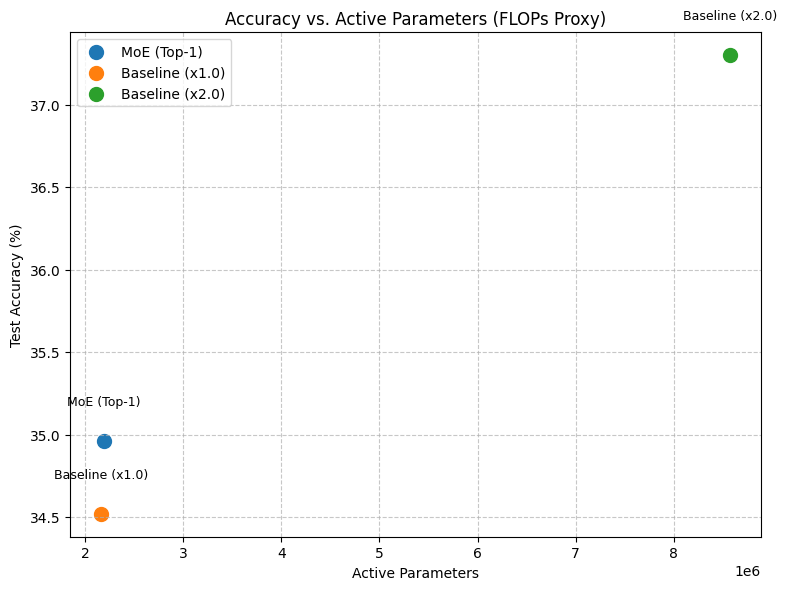

In [54]:
# Visualization: Parameters vs Performance (Storage vs Compute)

def count_total_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def count_active_params_moe(model):
    # Active = Router + 1 Expert (Top-1 Routing)
    router_params = sum(p.numel() for p in model.router.parameters())
    # Assuming all experts are identical
    expert_params = sum(p.numel() for p in model.experts[0].parameters())
    return router_params + expert_params

def plot_scatter(data, title, xlabel, save_name):
    plt.figure(figsize=(8, 6))
    for m in data:
        plt.scatter(m['params'], m['accuracy'], s=100, label=m['name'])
        # Add a small offset to text so it doesn't overlap the dot
        plt.text(m['params'], m['accuracy'] + 0.2, m['name'], fontsize=9, ha='center', va='bottom')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Test Accuracy (%)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, save_name))
    plt.show()

# 1. Prepare Data for Storage (Total Parameters)
# Shows memory footprint
storage_data = [
    {
        'name': 'MoE (Top-1)',
        'params': count_total_params(moe_model),
        'accuracy': history_moe['val_acc'][-1]
    },
    {
        'name': 'Baseline (x1.0)',
        'params': count_total_params(baseline_w1),
        'accuracy': history_base_w1['val_acc'][-1]
    },
    {
        'name': 'Baseline (x2.0)',
        'params': count_total_params(baseline_w2),
        'accuracy': history_base_w2['val_acc'][-1]
    }
]

# 2. Prepare Data for Compute (Active Parameters)
# Shows computational efficiency (FLOPs proxy)
compute_data = [
    {
        'name': 'MoE (Top-1)',
        'params': count_active_params_moe(moe_model), # ONLY Active
        'accuracy': history_moe['val_acc'][-1]
    },
    {
        'name': 'Baseline (x1.0)',
        'params': count_total_params(baseline_w1), # Dense runs everything
        'accuracy': history_base_w1['val_acc'][-1]
    },
    {
        'name': 'Baseline (x2.0)',
        'params': count_total_params(baseline_w2), # Dense runs everything
        'accuracy': history_base_w2['val_acc'][-1]
    }
]

print("=== Plot 1: Accuracy vs Total Parameters (Storage Cost) ===")
print("Conclusion: MoE requires more memory (Storage).")
plot_scatter(storage_data, 'Accuracy vs. Total Parameters (Storage)', 'Total Parameters', 'acc_vs_storage.png')

print("\n=== Plot 2: Accuracy vs Active Parameters (Inference Cost) ===")
print("Conclusion: MoE is strictly more efficient given the same compute budget.")
plot_scatter(compute_data, 'Accuracy vs. Active Parameters (FLOPs Proxy)', 'Active Parameters', 'acc_vs_compute.png')